## A first look at a neural network

In [27]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels), train_labels

(60000, array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels), test_labels

(10000, array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [7]:
# from keras import models
# from keras import layers

# The network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

In [8]:
# Compilation step
network.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [9]:
# Preparing the image data

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

In [10]:
# Preparing the labels

# from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 6ms/step - loss: 0.2693 - accuracy: 0.9219
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1092 - accuracy: 0.9678
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0724 - accuracy: 0.9783
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0521 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9885


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9751
test_acc:  0.9750999808311462


## Data representations for neural networks

In [15]:
# Scalars(0D tensors)

x = np.array(12)
x, x.ndim

(array(12), 0)

In [16]:
# Vectors(1D tensors)

x = np.array([12, 3, 6, 14])
x, x.ndim

(array([12,  3,  6, 14]), 1)

In [23]:
# Matrices(2D tensors)

x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print(x.ndim)
# first row and first column
x[0], x[:,0]

2


(array([ 5, 78,  2, 34,  0]), array([5, 6, 7]))

In [25]:
# 3D tensors and higher_dimensional tensors

x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [26]:
# Key attributes - rank, shape, data type

# from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


print(train_images.ndim) # number of axis of the tensor
print(train_images.shape) # shape
print(train_images.dtype) # data type

3
(60000, 28, 28)
uint8


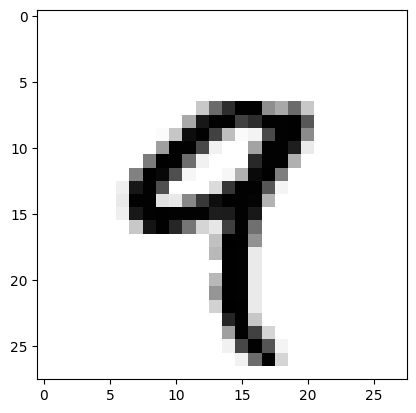

In [28]:
# Displaying the fourth digit
# import matplotlib.pyplot as plt


digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [29]:
# Manipulating tensors in Numpy

my_slice = train_images[10:100]
print(my_slice.shape)

# my_slice = train_images[10:100, :, :]
# my_slice.shape == (90, 28, 28)
# my_slice = train_images[10:100, :28, :29]
# my_slice.shape == (90, 28, 28)

(90, 28, 28)


In [31]:
my_slice = train_images[:, 14:, 14:] # bottom-right corner
my_slice = train_images[:, 7:-7, 7:-7] # 14x14 pixels centered in the middle


In [33]:
# The notion of data batches

f_batch = train_images[:128] # first batch
s_batch = train_images[128:256] # second batch
# nth_batch = train_images[128 * n:128 * (n + 1)]

In [35]:
# Element-wise operations

def naive_relu(x):
  assert len(x.shape) == 2

  x = x.copy # avoid overwriting
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

def naive_add(x): # for addition
  assert len(x.shape) == 2
  assert x.shape == y.shape

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

# import numpy as np
# z = x + y
# z = np.maximum(z, 0.)

In [38]:
# Broadcasting

def naive_add_matrix(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]

  return x

# import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

In [40]:
# Tensor dot

# z = np.dot(x, y)
# in mathematical notation z = x.y

# dot product of two vectors
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

# dot product between a matrix x and a vector y
def naive_matrix_vector_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]

  return z

# reuse the code we wrote previously
def naive_matrix_vector_dot(x, y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i, :], y)
  return z

# coefficients are the vector products between the rows of x and the columns of y
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]

  z = np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)

  return z

In [42]:
# Tensor reshaping

x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x.shape)

x = x.reshape((6, 1))
print(x)

x = x.reshape((2, 3))
x

(3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]


array([[0., 1., 2.],
       [3., 4., 5.]])

## What's a derivative

f(x + epsilon) = y + epsilon_y

f(x + epsilon) = y + a * epsilon_x - a is the magnitude of thederivative

## Derivative of a tensor operation: the gradient

y_pred = dot(W, x)

loss_value = loss(y_pred, y)

loss_value = f(W)

In [ ]:
# Stochastic gradient descent
"""
past_velocity = 0.
momentum = 0.1
while loss > 0.01:
  w, loss, gradient = get_current_parameters()
  velocity = past_velocity * momentum + learning_rate * gradient
  w = w + momentum * velocity - learning_rate * gradient
  past_velocity = velocity
  update_parameters(w)